In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic_data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.28,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.93,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.10,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,$13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,$30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,$23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,$30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,$7.75,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         885 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [6]:
# Fill missing 'Age' values with the median
df['Age']= df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' values with the mode
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

# Remove the '$' sign and convert 'Fare' column to numeric
df['Fare'] = df['Fare'].replace({'\$': ''}, regex= True)

# Convert the 'fare' column to a numeric type (float) using astype()
df['Fare'] = df['Fare'].astype(float)

df['Fare']= df['Fare'].fillna(df['Fare'].median())

# Drop columns not useful for prediction (e.g., 'Cabin' due to high missing rate, 'PassengerId', 'Ticket')
df.drop(columns=[ 'PassengerId', 'Ticket'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Here, SelectKBest selects the top k features based on statistical tests.

In [16]:
# Feature extraction: One-hot encode categorical features
categorical_features = ['Sex', 'Embarked']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = onehot_encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(categorical_features))
data = pd.concat([df.drop(columns=categorical_features), encoded_df], axis=1)

**Note:** When using drop='first', the first category (alphabetically by default) is dropped to avoid the dummy variable trap .


# **Dense Array**

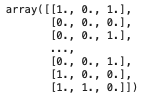

Here,all values (including zeros) are explicitly stored in memory.

# **Sparse Matrix**
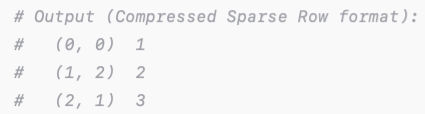

Here:

(0, 0) 1: The element 1 is located at row 0, column 0.

(1, 2) 2: The element 2 is located at row 1, column 2.

(2, 1) 3: The element 3 is located at row 2, column 1.


In [20]:
onehot_encoder.get_feature_names_out(categorical_features)

array(['Sex_male', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [18]:
encoded_df

,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
886,1.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [17]:
data

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.25,1.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.28,0.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.93,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.10,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.05,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.00,1.0,0.0,1.0
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.00,0.0,0.0,1.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,23.45,0.0,0.0,1.0
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.00,1.0,0.0,0.0


In [22]:
# Feature extraction: Create new features based on domain knowledge
# For example, creating a 'FamilySize' feature (siblings/spouses + parents/children + 1)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a feature indicating if the passenger is alone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Drop 'SibSp' and 'Parch' as they are now represented in 'FamilySize'
df.drop(columns=['SibSp', 'Parch'], inplace=True)

In [23]:
df

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.25,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.28,C,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.93,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.10,S,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.05,S,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.00,S,1,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.00,S,1,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,23.45,S,4,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.00,C,1,1


In [24]:
# Feature selection: Statistical selection using SelectKBest
X = df.drop(columns=['Survived','Name','Sex','Embarked'])
y = df['Survived']

In [25]:
# Normalize numerical features for chi2 computation
numerical_features = ['Age', 'Fare', 'FamilySize']
scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [26]:
X

,Pclass,Age,Fare,FamilySize,IsAlone
0,3,0.271174,0.014151,0.1,0
1,1,0.472229,0.139129,0.1,0
2,3,0.321438,0.015478,0.0,1
3,1,0.434531,0.103644,0.1,0
4,3,0.434531,0.015713,0.0,1
...,...,...,...,...,...
886,2,0.334004,0.025374,0.0,1
887,1,0.233476,0.058556,0.0,1
888,3,0.346569,0.045771,0.3,0
889,1,0.321438,0.058556,0.0,1


SelectKBest is a feature selection technique from scikit-learn (specifically in the sklearn.feature_selection module). It is used to select the top k features from a dataset based on their statistical relevance or importance.

In [48]:
# Use SelectKBest to select top 3 features
selector = SelectKBest(score_func=chi2, k=3)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]


print("\nSelected Features:")
print(selected_features)


Selected Features:
Index(['Pclass', 'Fare', 'IsAlone'], dtype='object')


In [49]:
# Final dataset with selected features
final_data = pd.DataFrame(X_selected, columns=selected_features)
final_data['Survived'] = y

In [50]:
final_data

,Pclass,Fare,IsAlone,Survived
0,3.0,0.014151,0.0,0
1,1.0,0.139129,0.0,1
2,3.0,0.015478,1.0,1
3,1.0,0.103644,0.0,1
4,3.0,0.015713,1.0,0
...,...,...,...,...
886,2.0,0.025374,1.0,0
887,1.0,0.058556,1.0,1
888,3.0,0.045771,0.0,0
889,1.0,0.058556,1.0,1


In [64]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(final_data[selected_features], final_data['Survived'], test_size=0.2)
# shuffle=False
# random_state=42

# Output the processed training data
print("\nProcessed Training Data:")
print(X_train.head())


Processed Training Data:
     Pclass      Fare  IsAlone
846     3.0  0.135752      0.0
361     2.0  0.054106      0.0
507     1.0  0.051822      1.0
39      3.0  0.021939      0.0
55      1.0  0.069291      1.0


In [65]:
X_train

,Pclass,Fare,IsAlone
846,3.0,0.135752,0.0
361,2.0,0.054106,0.0
507,1.0,0.051822,1.0
39,3.0,0.021939,0.0
55,1.0,0.069291,1.0
...,...,...,...
837,3.0,0.015713,1.0
577,1.0,0.109109,0.0
553,3.0,0.014112,1.0
647,1.0,0.069291,1.0


In [66]:
X_test

,Pclass,Fare,IsAlone
626,2.0,0.024106,1.0
830,3.0,0.028204,0.0
426,2.0,0.050749,0.0
233,3.0,0.061269,0.0
765,1.0,0.152168,0.0
...,...,...,...
637,2.0,0.051237,0.0
220,3.0,0.015713,1.0
199,2.0,0.025374,1.0
412,1.0,0.175668,0.0
